<a href="https://colab.research.google.com/github/Epsita-R/Reinforcement-Learning/blob/main/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random

class EpsilonGreedyBandit:
    def __init__(self, epsilon, num_ad_slots):
        self.epsilon = epsilon  # Exploration rate
        self.num_ad_slots = num_ad_slots  # Number of ad slots (arms)
        self.ad_slot_ctr_estimates = np.zeros(num_ad_slots)  # Estimated CTR for each ad slot
        self.ad_slot_clicks = np.zeros(num_ad_slots)  # Total clicks for each ad slot
        self.ad_slot_impressions = np.zeros(num_ad_slots)  # Total impressions for each ad slot

    def select_ad_slot(self):
        """Select an ad slot using epsilon-greedy algorithm."""
        if random.uniform(0, 1) < self.epsilon:
            # Exploration: Choose a random ad slot
            return random.randint(0, self.num_ad_slots - 1)
        else:
            # Exploitation: Choose the ad slot with the highest estimated CTR
            return np.argmax(self.ad_slot_ctr_estimates)

    def update_ad_slot(self, selected_ad_slot, reward):
        """Update the estimated CTR for the selected ad slot based on the reward."""
        self.ad_slot_impressions[selected_ad_slot] += 1
        self.ad_slot_clicks[selected_ad_slot] += reward

        # Update the CTR estimate for the selected ad slot
        self.ad_slot_ctr_estimates[selected_ad_slot] = (
            self.ad_slot_clicks[selected_ad_slot] / self.ad_slot_impressions[selected_ad_slot]
        )

def simulate_ad_impressions(epsilon_greedy, true_ad_slot_ctr, num_impressions):
    """Simulate the ad impressions and clicks."""
    total_clicks = 0

    for i in range(num_impressions):
        # Step 1: Select an ad slot using the epsilon-greedy strategy
        selected_ad_slot = epsilon_greedy.select_ad_slot()

        # Step 2: Simulate whether a click occurred based on the true CTR of the ad slot
        reward = 1 if random.uniform(0, 1) < true_ad_slot_ctr[selected_ad_slot] else 0

        # Step 3: Update the ad slot's estimated CTR
        epsilon_greedy.update_ad_slot(selected_ad_slot, reward)

        # Track total clicks for performance evaluation
        total_clicks += reward

    return total_clicks

# Parameters for the simulation
epsilon = 0.1  # 10% chance to explore
num_ad_slots = 4  # We have 4 ad slots (arms)
num_impressions = 1000  # Simulate 1000 ad impressions

# True click-through rates (CTR) for each ad slot
# Let's assume these values are known for simulation purposes
true_ad_slot_ctr = [0.05, 0.10, 0.08, 0.12]  # Top Banner, Sidebar, Footer, Pop-up

# Create an instance of the EpsilonGreedyBandit
epsilon_greedy_bandit = EpsilonGreedyBandit(epsilon, num_ad_slots)

# Run the simulation
total_clicks = simulate_ad_impressions(epsilon_greedy_bandit, true_ad_slot_ctr, num_impressions)

# Print results
print("Total Clicks:", total_clicks)
print("Estimated CTR for each ad slot:")
for i, ctr in enumerate(epsilon_greedy_bandit.ad_slot_ctr_estimates):
    print(f"Ad Slot {i + 1} (True CTR: {true_ad_slot_ctr[i]}): Estimated CTR = {ctr:.4f}")


Total Clicks: 60
Estimated CTR for each ad slot:
Ad Slot 1 (True CTR: 0.05): Estimated CTR = 0.0599
Ad Slot 2 (True CTR: 0.1): Estimated CTR = 0.0641
Ad Slot 3 (True CTR: 0.08): Estimated CTR = 0.0645
Ad Slot 4 (True CTR: 0.12): Estimated CTR = 0.0400


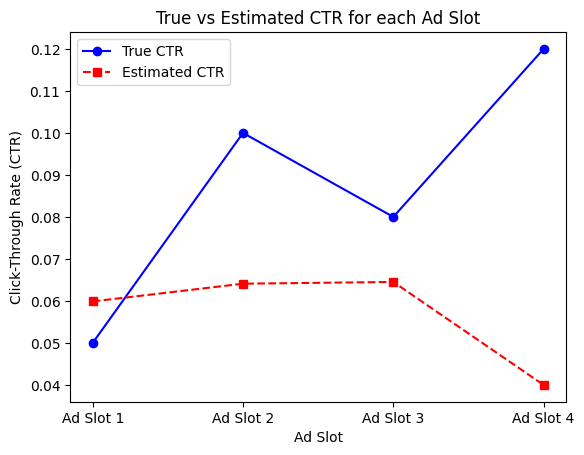

In [2]:
import matplotlib.pyplot as plt

# Arrange ad slot numbers for x-axis labels
ad_slot_labels = [f'Ad Slot {i + 1}' for i in range(num_ad_slots)]

# Plot the true CTRs
plt.plot(ad_slot_labels, true_ad_slot_ctr, marker='o', linestyle='-', color='b', label='True CTR')

# Plot the estimated CTRs
plt.plot(ad_slot_labels, epsilon_greedy_bandit.ad_slot_ctr_estimates, marker='s', linestyle='--', color='r', label='Estimated CTR')

plt.xlabel('Ad Slot')
plt.ylabel('Click-Through Rate (CTR)')
plt.title('True vs Estimated CTR for each Ad Slot')
plt.xticks(ad_slot_labels)
plt.legend()
plt.show()